Research Question:

> **How much and how long do countries borrow in total, on average and also split by sector and gender from KIVA, and how do these loans correlate with the term in months?**


Theory:

> This research question explores the relationship between loan characteristics (amount and duration), demographics (country and gender) on the Kiva platform. By analyzing these factors, we gain insights into lending patterns across countries and sectors, and how loan characteristics relate to loan durations.






# Load data

In [55]:
# Import & install the necessary libraries & packages
!pip install pyarrow
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from io import BytesIO
import requests
import matplotlib.ticker as mticker
from collections import Counter


In [56]:
# Loading the (KIVA) datasets
url_0 = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
df_0 = pd.read_csv(ZipFile(BytesIO(requests.get(url_0).content)).open("kiva_loans_part_0.csv"))

url_1 = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
df_1 = pd.read_csv(ZipFile(BytesIO(requests.get(url_1).content)).open("kiva_loans_part_1.csv"))

url_2 = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"
df_2 = pd.read_csv(ZipFile(BytesIO(requests.get(url_2).content)).open("kiva_loans_part_2.csv"))

In [57]:
# Mergering the 3 different (KIVA) datasets
df_merged = pd.concat([df_0, df_1, df_2])


# Overview

In [58]:
# For an overall understanding of the dataset, we can take a closer look at the first 10 rows and the corresponding columns
df_merged.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [59]:
# For an understanding of the length and width of the dataset, including how many have participated, shown in rows
df_merged.shape

(671205, 20)

In [60]:
df_merged.country.unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

## Research Question:

> **How much and how long do countries borrow in total, on average and also split by sector and gender from KIVA, and how do these loans correlate with the term in months?**

# Clean data

In [61]:
# Checking for data types and missing values as well as seeing summary statistics to get an overview
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

In [62]:
# Removing columns that are not needed for this analysis
df = df_merged.drop(['id', 'use', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'tags'], axis=1)

In [63]:
# Identify columns with missing values
df.isnull().sum()


,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,8
country,0
region,56800
currency,0
term_in_months,0
lender_count,0


In [64]:
# Fill missing regions with 'Unknown' and dropping rows with missing Borrower Gender & Country Code
df['region'].fillna('Unknown', inplace=True)
df.dropna(subset=['borrower_genders', 'country_code'], inplace=True)

In [65]:
# To analyze gender, we can take a closer look at how many are represented in the dataset
df['borrower_genders'].value_counts()

,count
borrower_genders,
female,426498
male,134706
"female, female",12164
"female, female, female",11676
"female, female, female, female",9052
...,...
"male, female, female, female, male, female, female, female, male, female, female, male, female, female, female, female, female",1
"female, female, male, female, male, female, female, male, female, female, female, female, female, female, female, female, female, female",1
"male, female, female, male, female, female, female, male, female, male, female, female, female",1


In [66]:
def clean_gender(gender_string):
    # Split the string by commas to get a list of genders
    genders = gender_string.split(', ')

    # Count the frequency of each gender
    gender_count = Counter(genders)

    # Return the gender with the highest frequency
    return gender_count.most_common(1)[0][0]

# Apply the function to the 'borrower_genders' column
df['borrower_genders'] = df['borrower_genders'].apply(clean_gender)

# Verify the results by checking the value counts
df['borrower_genders'].value_counts()

,count
borrower_genders,
female,517588
male,149388


In [67]:
df.isnull().sum()

,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,0
country,0
region,0
currency,0
term_in_months,0
lender_count,0


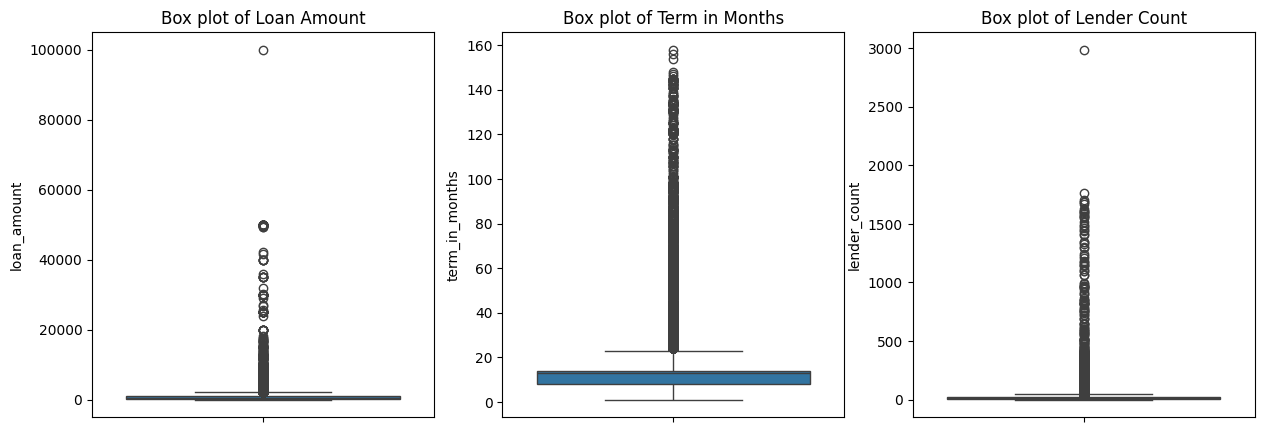

In [68]:
# Checking for outliers in Loan Amount using a sns box plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='loan_amount', ax=axes[0]).set_title('Box plot of Loan Amount')
sns.boxplot(data=df, y='term_in_months', ax=axes[1]).set_title('Box plot of Term in Months')
sns.boxplot(data=df, y='lender_count', ax=axes[2]).set_title('Box plot of Lender Count')
plt.show()

In [69]:
from scipy.stats import zscore

# Calculating Z-scores for each column separately
z_scores_loan = zscore(df['loan_amount'])
z_scores_term = zscore(df['term_in_months'])
z_scores_lender = zscore(df['lender_count'])

# Identifying outliers where Z-scores are greater than 3 or less than -3 to get 95% of data within 3 standard deviations
df['outlier_loan_amount'] = (z_scores_loan > 3) | (z_scores_loan < -3)
df['outlier_term_in_months'] = (z_scores_term > 3) | (z_scores_term < -3)
df['outlier_lender_count'] = (z_scores_lender > 3) | (z_scores_lender < -3)

# Combine outliers from all columns
df['outlier'] = df['outlier_loan_amount'] | df['outlier_term_in_months'] | df['outlier_lender_count']

# Remove the rows with outliers
df = df[~df['outlier']]

# Drop the helper columns used for outlier identification
df = df.drop(columns=['outlier', 'outlier_loan_amount', 'outlier_term_in_months', 'outlier_lender_count'])

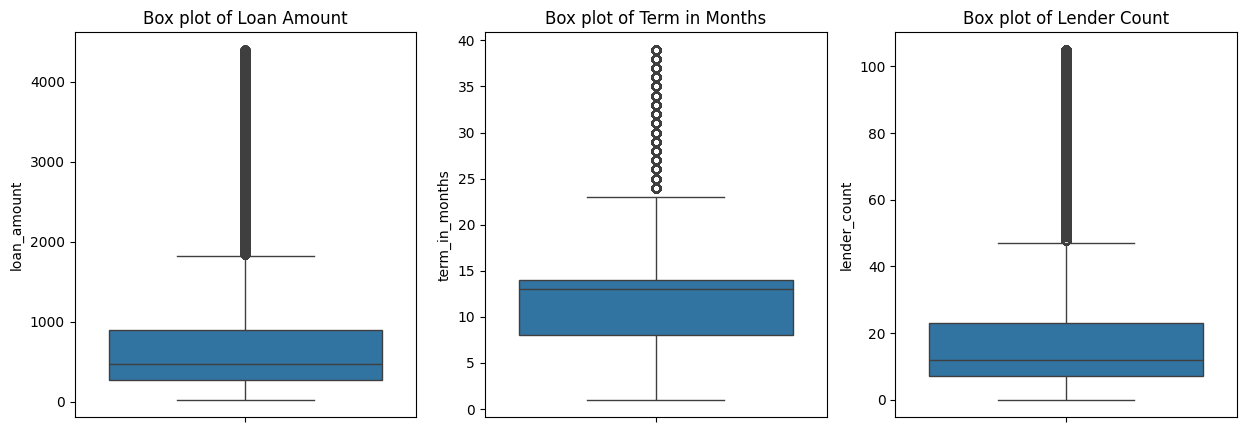

In [70]:
# Checking for outliers in Loan Amount using a sns box plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='loan_amount', ax=axes[0]).set_title('Box plot of Loan Amount')
sns.boxplot(data=df, y='term_in_months', ax=axes[1]).set_title('Box plot of Term in Months')
sns.boxplot(data=df, y='lender_count', ax=axes[2]).set_title('Box plot of Lender Count')
plt.show()

# 3. Descriptive Statistics

In [82]:
# Basic statistics for loan amounts
loan_stats = df['loan_amount'].describe()
loan_stats

,loan_amount
count,635099.000000
mean,690.794860
std,656.531868
min,25.000000
25%,275.000000
50%,475.000000
75%,900.000000
max,4400.000000


In [83]:
# Calculating mean, median, and variance
mean_loan = df['loan_amount'].mean()
median_loan = df['loan_amount'].median()
std_loan = df['loan_amount'].std()
variance_loan = df['loan_amount'].var()

print(mean_loan)
print(median_loan)
print(std_loan)
print(variance_loan)

690.7948603288621
475.0
656.5318679126707
431034.09358490043


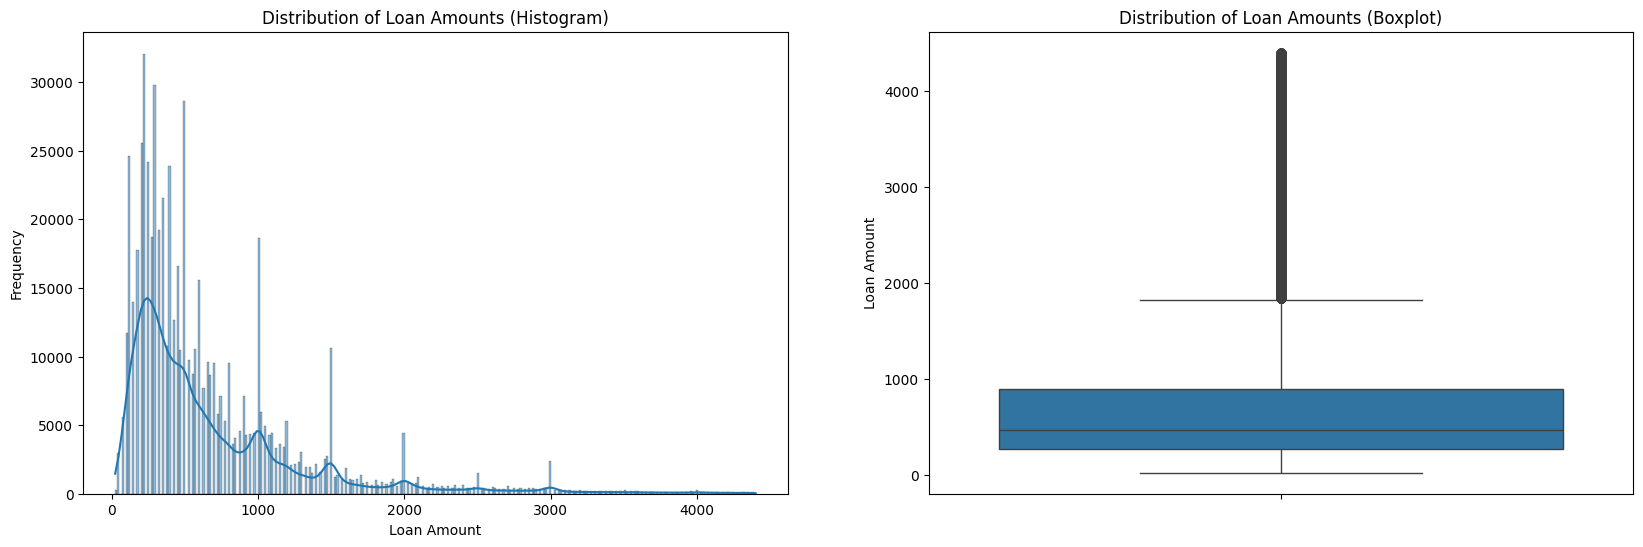

In [72]:
# Plotting the distribution of Loan Amounts
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(df['loan_amount'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Loan Amounts (Histogram)')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

sns.boxplot(y=df['loan_amount'], ax=axes[1])
axes[1].set_title('Distribution of Loan Amounts (Boxplot)')
axes[1].set_ylabel('Loan Amount')

plt.show()

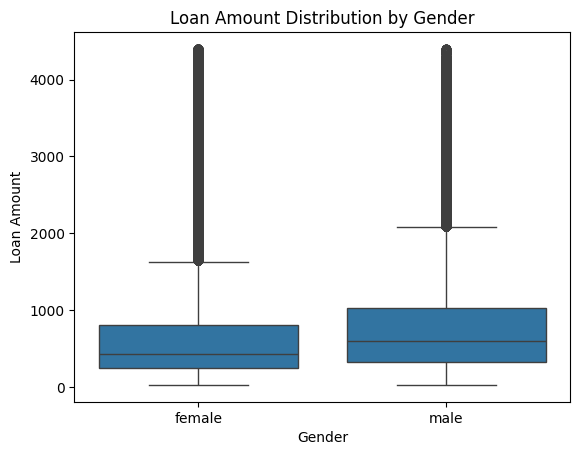

In [73]:
# Loan distribution by gender
sns.boxplot(x='borrower_genders', y='loan_amount', data=df)
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Gender')
plt.show()

# Exploratory data analysis and visualization

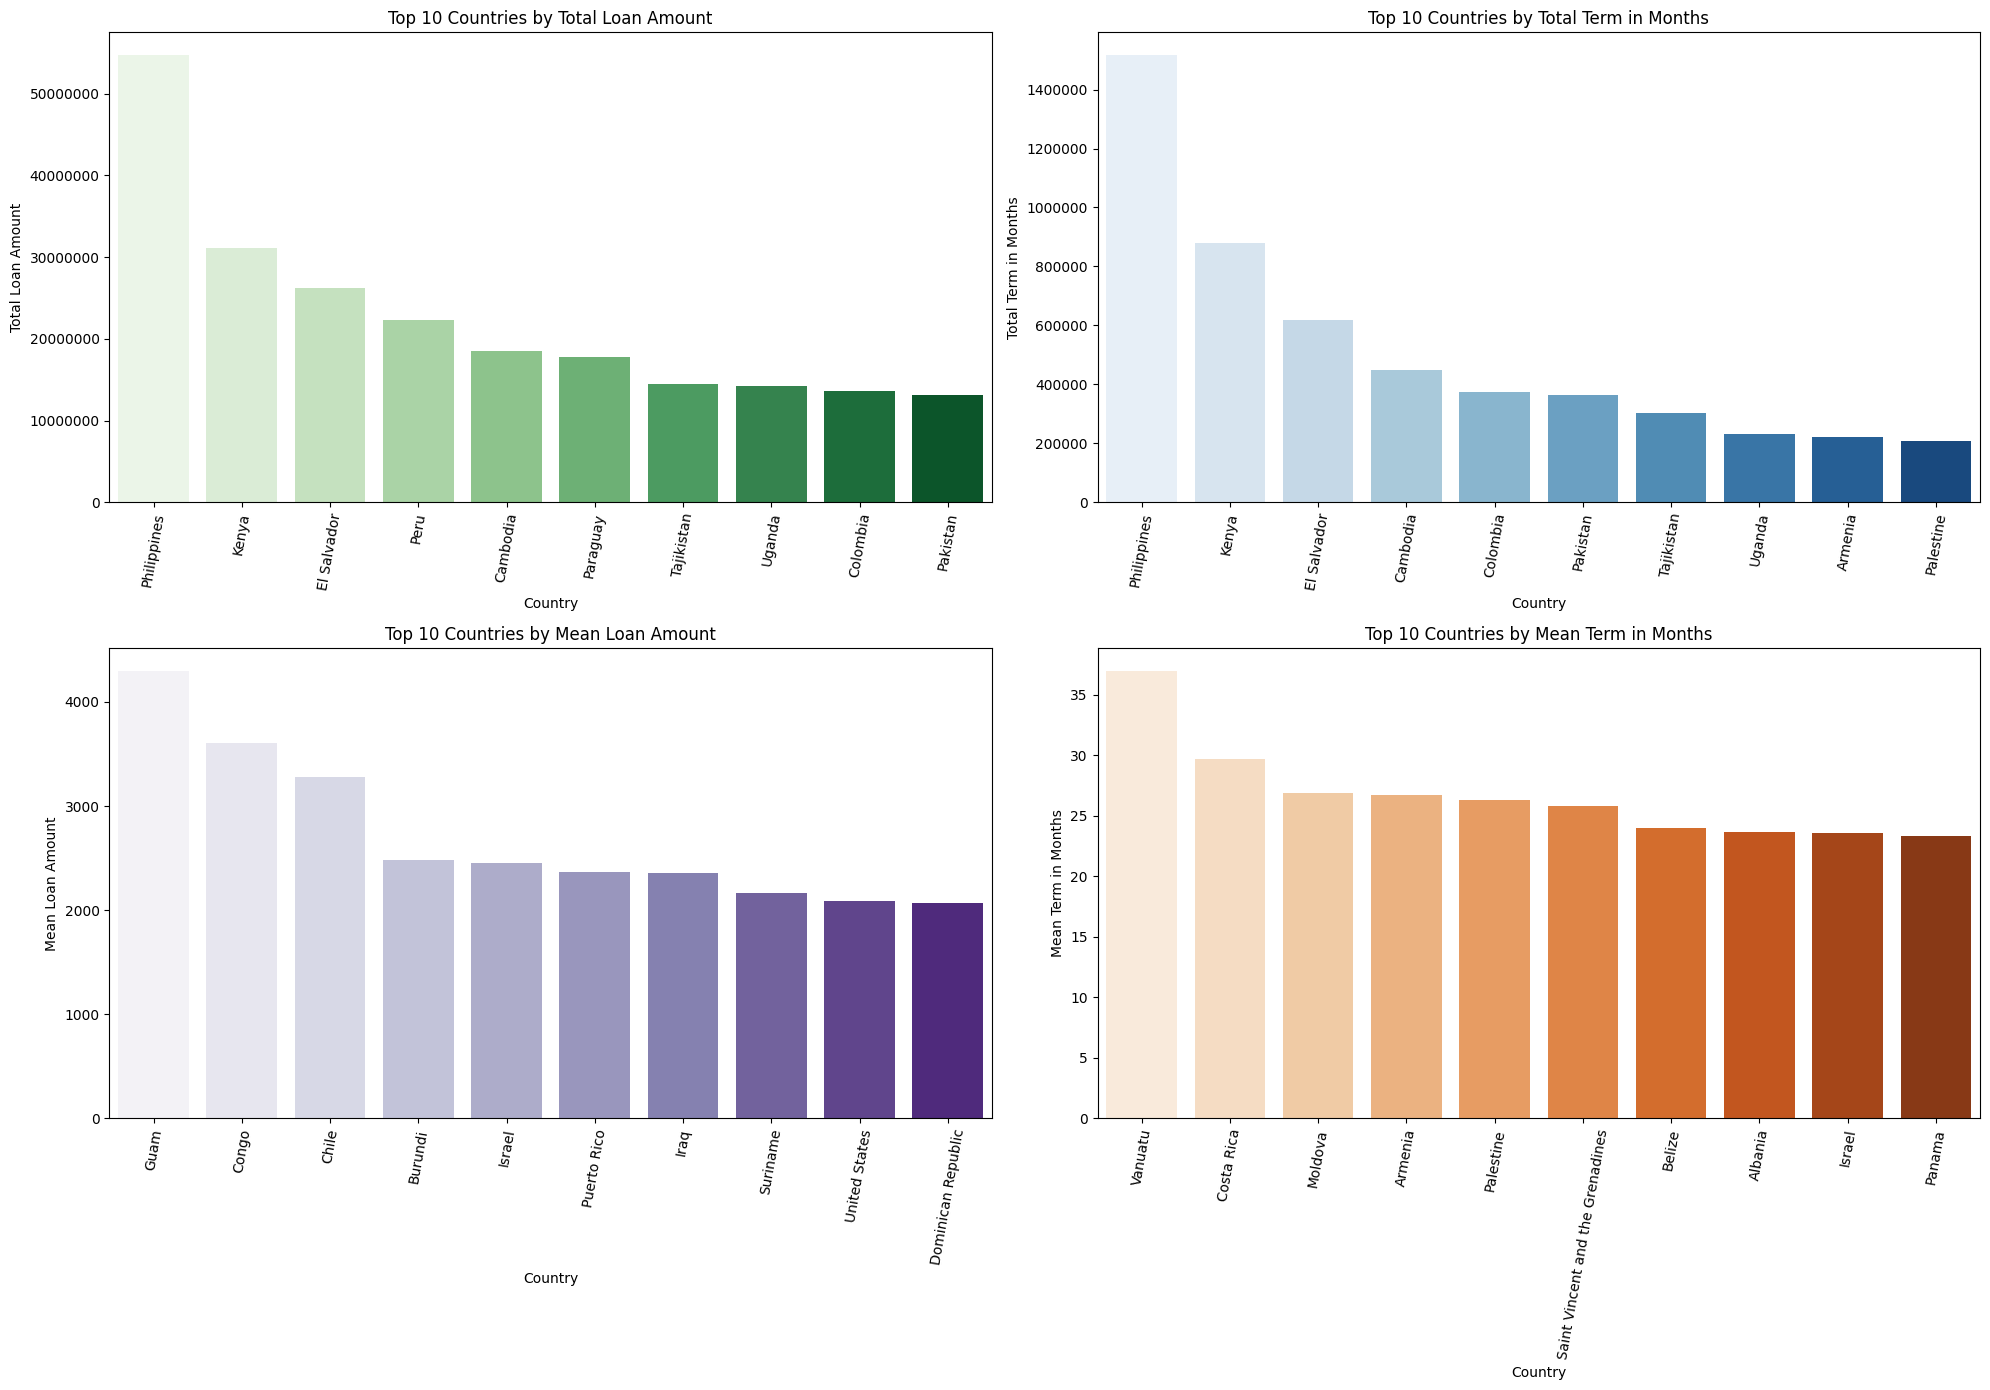

In [74]:
# Aggregate data by country for both mean and sum
country_summary = df.groupby('country').agg({'loan_amount': ['mean', 'sum'], 'term_in_months': ['mean', 'sum']})

# Flatten the column names after aggregation
country_summary.columns = ['mean_loan_amount', 'sum_loan_amount', 'mean_term_in_months', 'sum_term_in_months']

# Create top 10 variables for both mean and sum
top_10_contries_mean_loan_amount = country_summary.nlargest(10, 'mean_loan_amount')
top_10_contries_sum_loan_amount = country_summary.nlargest(10, 'sum_loan_amount')
top_10_contries_mean_term_in_months = country_summary.nlargest(10, 'mean_term_in_months')
top_10_contries_sum_term_in_months = country_summary.nlargest(10, 'sum_term_in_months')

# Create a figure with four subplots (no shared y-axis)
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # Increased figsize for better spacing

# Formatter to disable scientific notation
for ax in axes.flat:
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())  # Disable scientific notation
    ax.ticklabel_format(style='plain', axis='y')  # Force plain formatting

# Plot top 10 countries by sum loan amount
sns.barplot(x='country', y='sum_loan_amount', hue='country', data=top_10_contries_sum_loan_amount, palette='Greens', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Top 10 Countries by Total Loan Amount')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Total Loan Amount')
axes[0, 0].tick_params(axis='x', rotation=80)

# Plot top 10 countries by sum term in months
sns.barplot(x='country', y='sum_term_in_months', hue='country', data=top_10_contries_sum_term_in_months, palette='Blues', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Top 10 Countries by Total Term in Months')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Total Term in Months')
axes[0, 1].tick_params(axis='x', rotation=80)

# Plot top 10 countries by mean loan amount
sns.barplot(x='country', y='mean_loan_amount', hue='country', data=top_10_contries_mean_loan_amount, palette='Purples', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Top 10 Countries by Mean Loan Amount')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Mean Loan Amount')
axes[1, 0].tick_params(axis='x', rotation=80)


# Plot top 10 countries by mean term in months
sns.barplot(x='country', y='mean_term_in_months', hue='country', data=top_10_contries_mean_term_in_months, palette='Oranges', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Top 10 Countries by Mean Term in Months')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Mean Term in Months')
axes[1, 1].tick_params(axis='x', rotation=80)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


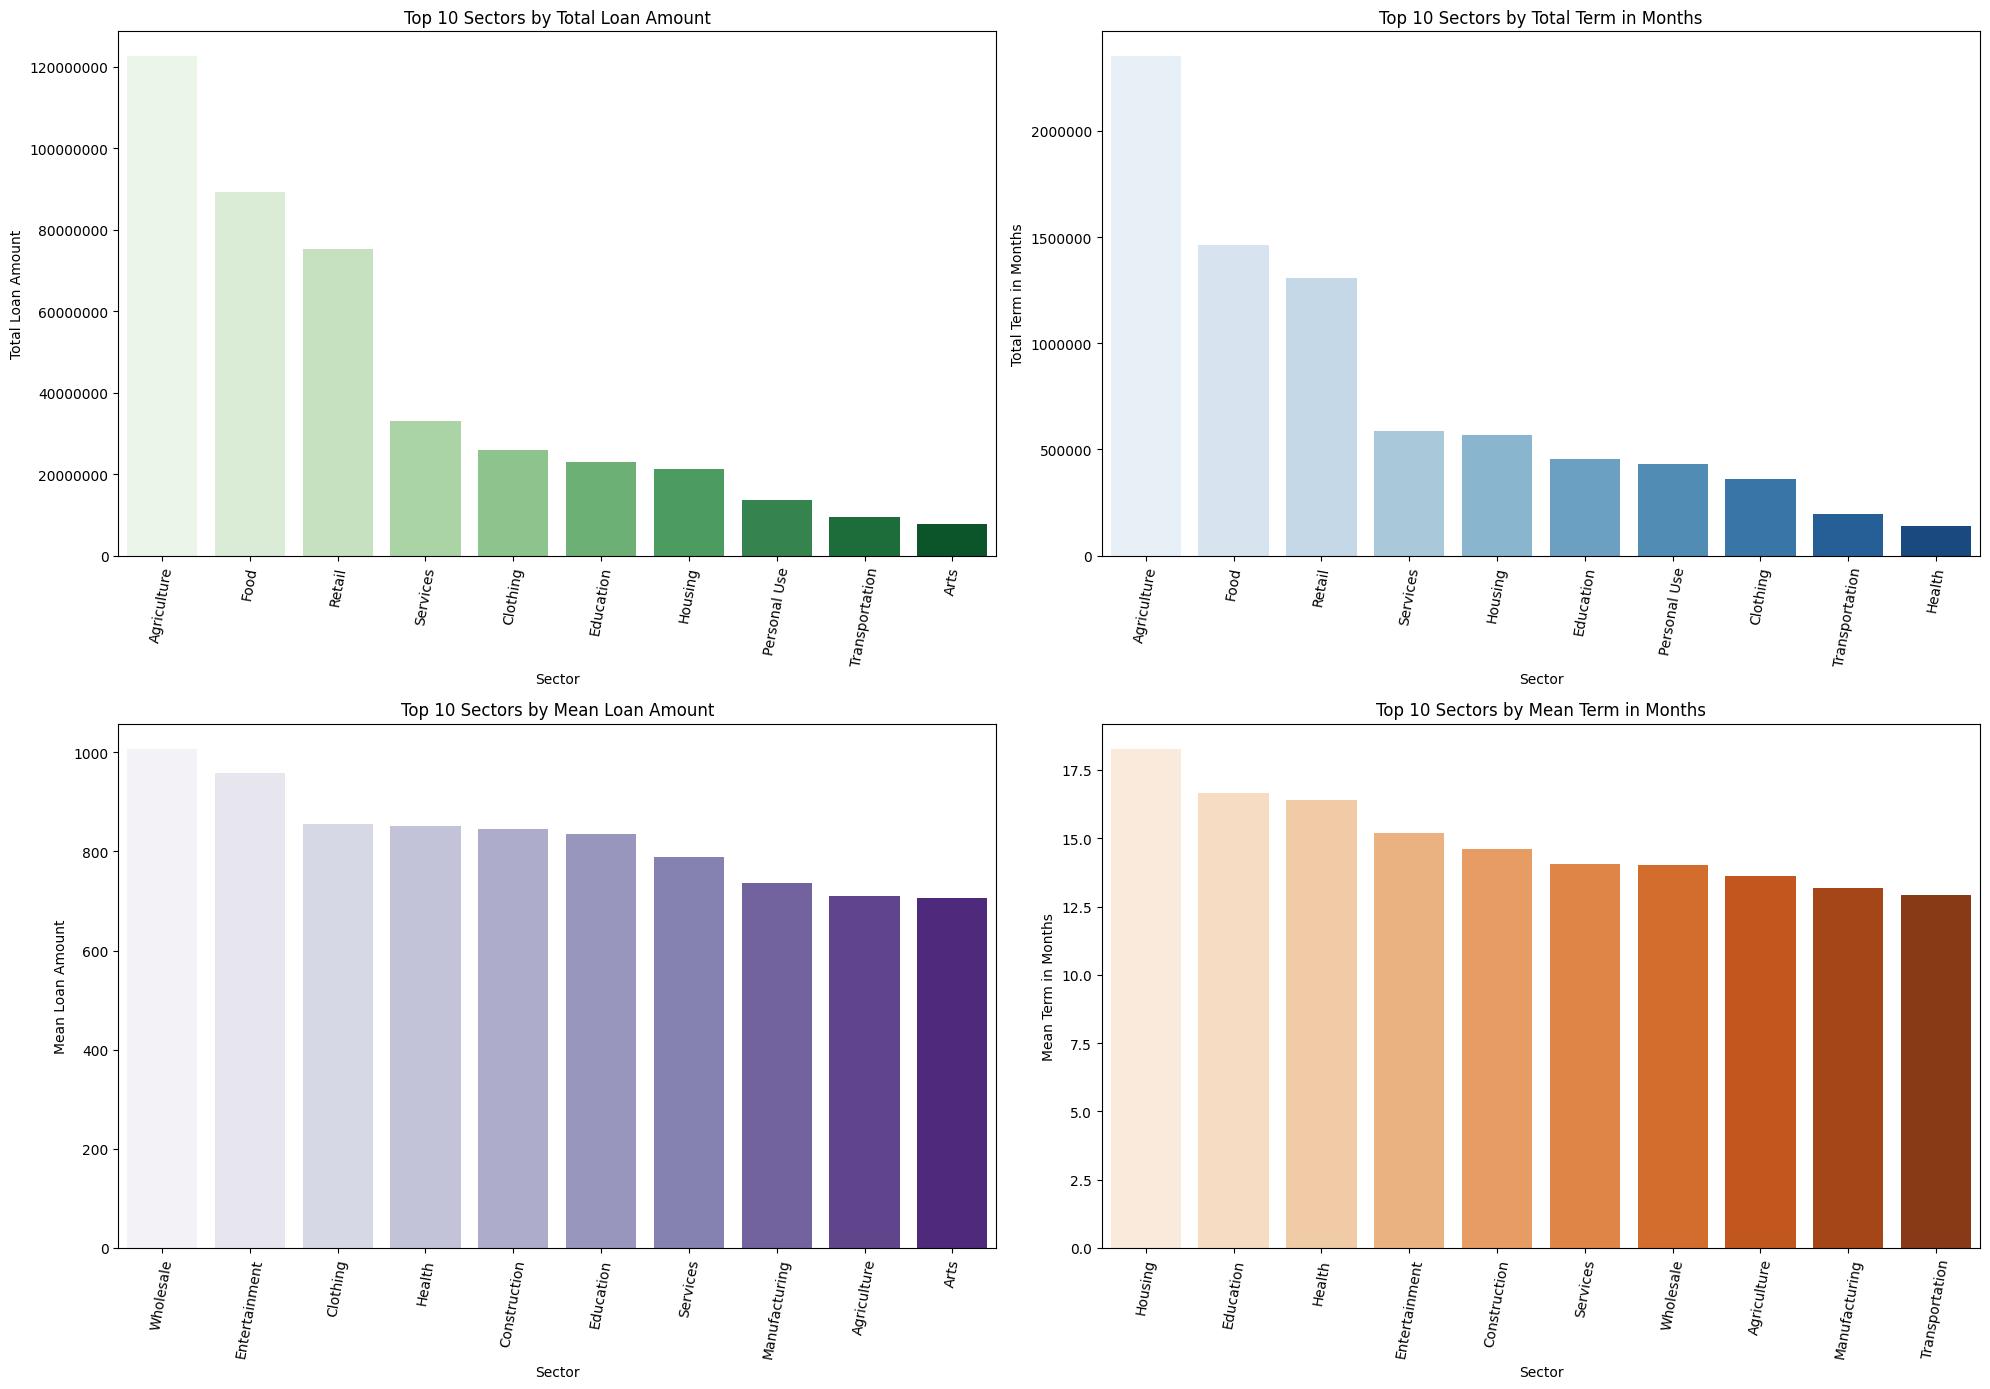

In [75]:
# Aggregate data by country for both mean and sum
sector_summary = df.groupby('sector').agg({'loan_amount': ['mean', 'sum'], 'term_in_months': ['mean', 'sum']})

# Flatten the column names after aggregation
sector_summary.columns = ['mean_loan_amount', 'sum_loan_amount', 'mean_term_in_months', 'sum_term_in_months']

# Create top 10 variables for both mean and sum
top_10_sectors_mean_loan_amount = sector_summary.nlargest(10, 'mean_loan_amount')
top_10_sectors_sum_loan_amount = sector_summary.nlargest(10, 'sum_loan_amount')
top_10_sectors_mean_term_in_months = sector_summary.nlargest(10, 'mean_term_in_months')
top_10_sectors_sum_term_in_months = sector_summary.nlargest(10, 'sum_term_in_months')

# Create a figure with four subplots (no shared y-axis)
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  # Increased figsize for better spacing

# Formatter to disable scientific notation
for ax in axes.flat:
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())  # Disable scientific notation
    ax.ticklabel_format(style='plain', axis='y')  # Force plain formatting

# Plot top 10 countries by sum loan amount
sns.barplot(x='sector', y='sum_loan_amount', hue='sector', data=top_10_sectors_sum_loan_amount, palette='Greens', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Top 10 Sectors by Total Loan Amount')
axes[0, 0].set_xlabel('Sector')
axes[0, 0].set_ylabel('Total Loan Amount')
axes[0, 0].tick_params(axis='x', rotation=80)

# Plot top 10 countries by sum term in months
sns.barplot(x='sector', y='sum_term_in_months', hue='sector', data=top_10_sectors_sum_term_in_months, palette='Blues', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Top 10 Sectors by Total Term in Months')
axes[0, 1].set_xlabel('Sector')
axes[0, 1].set_ylabel('Total Term in Months')
axes[0, 1].tick_params(axis='x', rotation=80)

# Plot top 10 countries by mean loan amount
sns.barplot(x='sector', y='mean_loan_amount', hue='sector', data=top_10_sectors_mean_loan_amount, palette='Purples', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Top 10 Sectors by Mean Loan Amount')
axes[1, 0].set_xlabel('Sector')
axes[1, 0].set_ylabel('Mean Loan Amount')
axes[1, 0].tick_params(axis='x', rotation=80)


# Plot top 10 countries by mean term in months
sns.barplot(x='sector', y='mean_term_in_months', hue='sector', data=top_10_sectors_mean_term_in_months, palette='Oranges', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Top 10 Sectors by Mean Term in Months')
axes[1, 1].set_xlabel('Sector')
axes[1, 1].set_ylabel('Mean Term in Months')
axes[1, 1].tick_params(axis='x', rotation=80)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of KIVA Attributes')

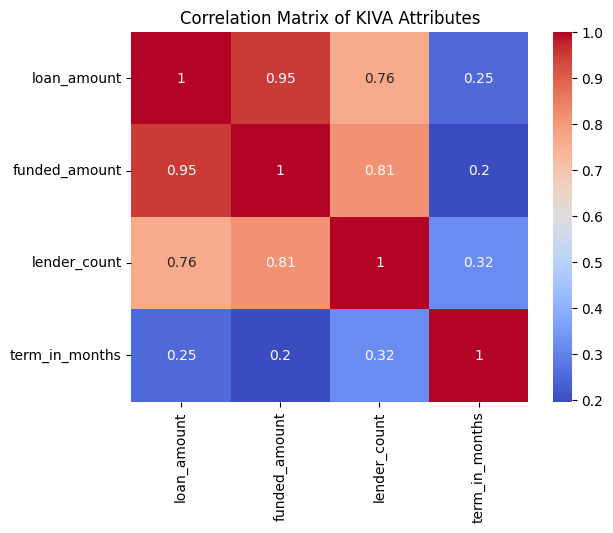

In [76]:
# Creating Correlation Matrix with the 4 key variables
columns = ['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']

# Calculating the correlation matrix
corr_matrix = df[columns].corr()

# Creating a heatmap from the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of KIVA Attributes')


Research Question:

> **How much and how long do countries borrow in total, on average and also split by sector and gender from KIVA, and how do these loans correlate with the term in months?**


Conclusion:

For countries:
*   Countries total loan amount goes up to 55,0000,000
*   Countries mean loan amount borrowed goes up to 4,200

*   Countries total terms in month goes up to 1,450,000
*   Counrties mean terms in month goes up to 37


For Sector:
*   Sectors total amount borrowed goes up to 120,000,000
*   Sectors mean loan amount borrowed goes up to 1,0000

*   Sector total terms in month goes up to  2,490,000
*   Sector mean terms in month goes up to 18


For genders:
*   Men tend to take out higher loans than women


For the correlation between loan amount and term in months
*   There is no significant relationship between loan amount and term in months